# Statistique en Grande Dimension et Apprentissage - Data Challenge

Solène Lesage
Chloé Douarec
Meriem Becheikh

Il s'agit d'un challenge disponible à l'adresse : https://challengedata.ens.fr/participants/challenges/67/ proposé par l'ENS.

L'objectif est de prévoir les "surge" dans deux villes côtières d'Europe occidentale.<br>
Nous nous plaçons dans une configuration de prévision : connaissant les valeurs de surge et le champ de pression au niveau de la mer des 5 derniers jours, nous voulons prédire les valeurs de surge des 5 prochains jours. Il s'agit donc d'un problème de prédiction de séries temporelles. 

# Outils utilisés

## Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

## Métrique utilisée : MSE avec poids

In [2]:
def surge_prediction_metric(y_true, y_pred):
    """
    Métrique utilisée pour mesurer la qualité de la prévision. 
    Les scores de prédictions pour les deux villes sont calculées indépendamment, et la perte finale est leur somme.
    Prend des dataframes en entrée.
    """
    w = np.linspace(1, 0.1, 10)[np.newaxis]
    surge1_cols = [
        'surge1_t0', 'surge1_t1', 'surge1_t2', 'surge1_t3', 'surge1_t4',
        'surge1_t5', 'surge1_t6', 'surge1_t7', 'surge1_t8', 'surge1_t9' ]
    surge2_cols = [
        'surge2_t0', 'surge2_t1', 'surge2_t2', 'surge2_t3', 'surge2_t4',
        'surge2_t5', 'surge2_t6', 'surge2_t7', 'surge2_t8', 'surge2_t9' ]
    surge1_score = (w * (y_true[surge1_cols].values - y_pred[surge1_cols].values)**2).mean()
    surge2_score = (w * (y_true[surge2_cols].values - y_pred[surge2_cols].values)**2).mean()

    return surge1_score + surge2_score

Les valeurs de surge étant normalisées, $1-ℓ$ peut être vu comme un pourcentage de variance expliquée. Avec une prédiction zéro triviale de toutes les valeurs, le score est $ℓ≈1$, ce qui signifie que nous expliquons 0 % de la variance. Un score supérieur à 1 est donc pire que la prédiction nulle et peut être considéré comme mauvais.

# Description des données

L'entrée X est codée au format numpy .npz et se compose de :

- id_séquence : les ids de la séquence
- t_slp : les 40 heures GMT auxquelles les champs de pression au niveau de la mer (SLP) sont donnés.
- slp : les 40 champs de pression au niveau de la mer (SLP), encodés dans des images de taille (41, 41).
- t_surge1_input : les 10 heures GMT auxquelles sont données les hauteurs de surge dans la ville 1.
- surge1_input : les hauteurs de surge données dans la ville 1.
- t_surge2_input : les 10 heures GMT auxquelles les hauteurs de surge sont données dans la ville 2.
- surge2_input : les hauteurs de surge données dans la ville 2.
- t_surge1_output : les 10 heures GMT auxquelles nous devons prédire les hauteurs de surge dans la ville 1.
- t_surge2_output : les 10 heures GMT auxquelles nous devons prévoir les hauteurs de surge dans la ville 2.


In [3]:
import numpy 
X_train = np.load('X_train_surge_new.npz')
Y_train = pd.read_csv('Y_train_surge.csv')
X_test = np.load('X_test_surge_new.npz')

surge_train = np.array(Y_train)[:,1:]
slp = X_train['slp']

In [4]:
#Visulaiser les données en un df
df= pd.DataFrame.from_dict({item: X_train[item] for item in X_train.files}, orient='index')
df.T


,id_sequence,t_slp,slp,t_surge1_input,surge1_input,t_surge2_input,surge2_input,t_surge1_output,t_surge2_output
0,1,"[-631076400.0, -631065600.0, -631054800.0, -63...","[[[102389.25, 102458.25, 102514.25, 102554.25,...","[-631108800.0, -631065600.0, -631018800.0, -63...","[-0.54593754, 0.13110517, 0.31880018, 0.194787...","[-631101600.0, -631058400.0, -631015200.0, -63...","[-0.41432458, -1.0094675, -1.2022604, -1.19387...","[-630662400.0, -630619200.0, -630576000.0, -63...","[-630658800.0, -630615600.0, -630568800.0, -63..."
1,2,"[-630979200.0, -630968400.0, -630957600.0, -63...","[[[101895.6, 101970.6, 102032.6, 102077.6, 102...","[-631018800.0, -630975600.0, -630928800.0, -63...","[0.31880018, 0.19478741, -0.22752637, -0.40181...","[-631015200.0, -630968400.0, -630925200.0, -63...","[-1.2022604, -1.193878, -1.1435843, -0.8166747...","[-630576000.0, -630532800.0, -630486000.0, -63...","[-630568800.0, -630525600.0, -630482400.0, -63..."
2,3,"[-630892800.0, -630882000.0, -630871200.0, -63...","[[[101661.24, 101700.24, 101774.24, 101849.24,...","[-630928800.0, -630885600.0, -630842400.0, -63...","[-0.22752637, -0.4018146, -0.87440383, -0.6397...","[-630925200.0, -630882000.0, -630835200.0, -63...","[-1.1435843, -0.81667477, -0.7579987, -0.12932...","[-630486000.0, -630442800.0, -630399600.0, -63...","[-630482400.0, -630435600.0, -630392400.0, -63..."
3,4,"[-630806400.0, -630795600.0, -630784800.0, -63...","[[[101366.41, 101393.41, 101476.41, 101577.41,...","[-630842400.0, -630799200.0, -630752400.0, -63...","[-0.87440383, -0.63978505, -1.0755056, -1.7123...","[-630835200.0, -630792000.0, -630748800.0, -63...","[-0.7579987, -0.12932655, -0.17962031, -0.3724...","[-630399600.0, -630352800.0, -630309600.0, -63...","[-630392400.0, -630349200.0, -630302400.0, -63..."
4,5,"[-630720000.0, -630709200.0, -630698400.0, -63...","[[[101245.49, 101220.49, 101209.49, 101225.49,...","[-630752400.0, -630709200.0, -630662400.0, -63...","[-1.0755056, -1.712328, 0.58693594, 1.0695802,...","[-630748800.0, -630702000.0, -630658800.0, -63...","[-0.17962031, -0.3724131, -0.05388589, 0.35684...","[-630309600.0, -630266400.0, -630219600.0, -63...","[-630302400.0, -630259200.0, -630212400.0, -63..."
...,...,...,...,...,...,...,...,...,...
5594,5595,"[1287478800.0, 1287489500.0, 1287500400.0, 128...","[[[101470.0, 101486.0, 101501.0, 101517.0, 101...","[1287442800.0, 1287486000.0, 1287532800.0, 128...","[1.9376696, 1.6092033, 0.86177504, 1.2974956, ...","[1287450000.0, 1287493200.0, 1287540000.0, 128...","[0.021554768, 0.62508005, 0.39037576, 0.457434...","[1287885600.0, 1287932400.0, 1287972000.0, 128...","[1287892700.0, 1287936000.0, 1287979300.0, 128..."
5595,5596,"[1287565200.0, 1287576000.0, 1287586800.0, 128...","[[[101663.87, 101650.87, 101641.87, 101635.87,...","[1287532800.0, 1287576000.0, 1287619200.0, 128...","[0.86177504, 1.2974956, 0.50984687, 0.87518185...","[1287540000.0, 1287583200.0, 1287626400.0, 128...","[0.39037576, 0.45743412, 0.28140593, 0.4322872...","[1287972000.0, 1288018800.0, 1288062000.0, 128...","[1287979300.0, 1288022400.0, 1288069200.0, 128..."
5596,5597,"[1287651600.0, 1287662300.0, 1287673200.0, 128...","[[[101876.15, 101838.15, 101801.15, 101765.15,...","[1287619200.0, 1287666000.0, 1287705600.0, 128...","[0.50984687, 0.87518185, 1.8505255, 1.193593, ...","[1287626400.0, 1287669600.0, 1287716400.0, 128...","[0.28140593, 0.43228725, 0.15567149, 0.2478767...","[1288062000.0, 1288108800.0, 1288152000.0, 128...","[1288069200.0, 1288112400.0, 1288155600.0, 128..."
5597,5598,"[1287738000.0, 1287748900.0, 1287759600.0, 128...","[[[102152.04, 102120.04, 102085.04, 102047.04,...","[1287705600.0, 1287752400.0, 1287795600.0, 128...","[1.8505255, 1.193593, 1.3980465, 1.7801399, 1....","[1287716400.0, 1287759600.0, 1287802800.0, 128...","[0.15567149, 0.24787673, 0.41552263, 0.5412571...","[1288152000.0, 1288195200.0, 1288242000.0, 128...","[1288155600.0, 1288202400.0, 1288245600.0, 128..."


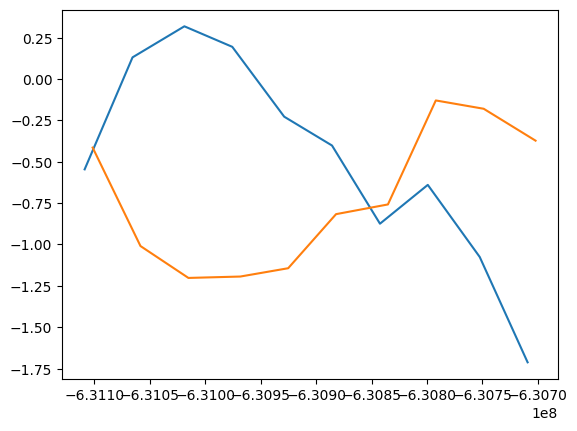

In [5]:
#Affihcer la inputs 1 et 2 des la premiere sequence en fonction des t_surge
plt.plot(df[0]["t_surge1_input"],df[0]["surge1_input"])
plt.plot(df[0]["t_surge2_input"],df[0]["surge2_input"])

In [6]:
pd.DataFrame(X_train,columns=["Variables"])

,Variables
0,id_sequence
1,t_slp
2,slp
3,t_surge1_input
4,surge1_input
5,t_surge2_input
6,surge2_input
7,t_surge1_output
8,t_surge2_output


La sortie Y est encodée dans un fichier csv avec les colonnes :

- id_séquence : les ids de la séquence
- surge1_t{0...9} : la hauteur de surge correcte dans la ville 1 au temps 0 à 9
- surge2_t{0...9} : la hauteur de surge correcte dans la ville 2 au temps 0 à 9

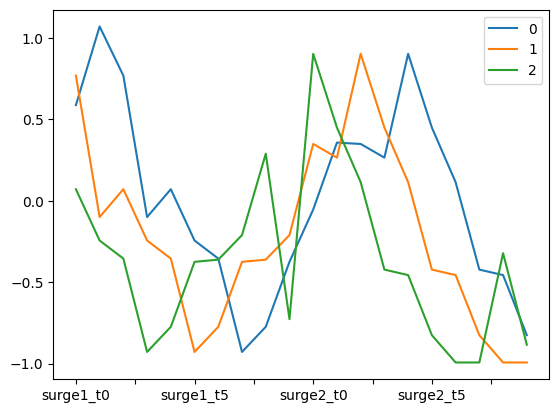

In [7]:
Y_train=pd.read_csv("Y_train_surge.csv")
for i in range(3):
  Y_train.iloc[i].drop('id_sequence').plot(legend=True)


In [8]:
Y_train

,id_sequence,surge1_t0,surge1_t1,surge1_t2,surge1_t3,surge1_t4,surge1_t5,surge1_t6,surge1_t7,surge1_t8,...,surge2_t0,surge2_t1,surge2_t2,surge2_t3,surge2_t4,surge2_t5,surge2_t6,surge2_t7,surge2_t8,surge2_t9
0,1,0.586936,1.069580,0.767928,-0.100162,0.070775,-0.244285,-0.354891,-0.928031,-0.773853,...,-0.053886,0.356847,0.348464,0.264641,0.901696,0.449052,0.113760,-0.422707,-0.456236,-0.825057
1,2,0.767928,-0.100162,0.070775,-0.244285,-0.354891,-0.928031,-0.773853,-0.375001,-0.361594,...,0.348464,0.264641,0.901696,0.449052,0.113760,-0.422707,-0.456236,-0.825057,-0.992703,-0.992703
2,3,0.070775,-0.244285,-0.354891,-0.928031,-0.773853,-0.375001,-0.361594,-0.210768,0.288635,...,0.901696,0.449052,0.113760,-0.422707,-0.456236,-0.825057,-0.992703,-0.992703,-0.322119,-0.883733
3,4,-0.354891,-0.928031,-0.773853,-0.375001,-0.361594,-0.210768,0.288635,-0.726929,-0.576103,...,0.113760,-0.422707,-0.456236,-0.825057,-0.992703,-0.992703,-0.322119,-0.883733,-0.473001,-0.422707
4,5,-0.773853,-0.375001,-0.361594,-0.210768,0.288635,-0.726929,-0.576103,1.160076,0.442813,...,-0.456236,-0.825057,-0.992703,-0.992703,-0.322119,-0.883733,-0.473001,-0.422707,-0.473001,-0.531677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,5595,1.451674,1.220407,0.556771,1.709754,0.483033,0.533309,1.448322,1.820360,1.662831,...,0.759197,0.884931,0.298171,-0.397560,-0.540059,-0.498148,-0.498148,-0.405942,0.164054,0.331700
5595,5596,0.556771,1.709754,0.483033,0.533309,1.448322,1.820360,1.662831,1.528763,1.284089,...,0.298171,-0.397560,-0.540059,-0.498148,-0.498148,-0.405942,0.164054,0.331700,1.052577,1.220223
5596,5597,0.483033,0.533309,1.448322,1.820360,1.662831,1.528763,1.284089,0.070775,0.888589,...,-0.540059,-0.498148,-0.498148,-0.405942,0.164054,0.331700,1.052577,1.220223,1.446545,2.670360
5597,5598,1.448322,1.820360,1.662831,1.528763,1.284089,0.070775,0.888589,1.545521,1.166779,...,-0.498148,-0.405942,0.164054,0.331700,1.052577,1.220223,1.446545,2.670360,2.620066,2.678742


## slp_train

In [9]:
nfields = 5; time_step_slp = 8
slp_train = []
slp_all = X_train['slp']
for i in range(5599): # echantillon d'apprentissage de 5599 observations
    slp_train.append(np.ndarray.flatten(slp_all[i,-1]))
    for j in range(1,nfields):
        slp_train[-1] = np.concatenate( ( slp_train[-1], np.ndarray.flatten(slp_all[i,-1-j*time_step_slp]) ) )
slp_train = np.array(slp_train)

In [10]:
pd.DataFrame(slp_train)

,0,1,2,3,4,5,6,7,8,9,...,8395,8396,8397,8398,8399,8400,8401,8402,8403,8404
0,100849.718750,100797.718750,100754.718750,100716.718750,100692.718750,100686.718750,100710.718750,100769.718750,100857.718750,100958.718750,...,100989.742188,100904.742188,100827.742188,100763.742188,100712.742188,100672.742188,100644.742188,100635.742188,100646.742188,100671.742188
1,100940.367188,100881.367188,100823.367188,100765.367188,100711.367188,100660.367188,100619.367188,100594.367188,100592.367188,100610.367188,...,102031.546875,102016.546875,102002.546875,101986.546875,101969.546875,101953.546875,101939.546875,101926.546875,101913.546875,101902.546875
2,101862.906250,101879.906250,101894.906250,101905.906250,101913.906250,101917.906250,101917.906250,101914.906250,101909.906250,101901.906250,...,101959.078125,101946.078125,101935.078125,101927.078125,101927.078125,101939.078125,101965.078125,101999.078125,102039.078125,102082.078125
3,102149.296875,102216.296875,102275.296875,102327.296875,102373.296875,102415.296875,102450.296875,102481.296875,102507.296875,102525.296875,...,101787.796875,101822.796875,101853.796875,101879.796875,101899.796875,101917.796875,101933.796875,101945.796875,101954.796875,101962.796875
4,102321.757812,102333.757812,102361.757812,102396.757812,102431.757812,102462.757812,102488.757812,102508.757812,102518.757812,102520.757812,...,101303.718750,101320.718750,101341.718750,101368.718750,101399.718750,101434.718750,101473.718750,101515.718750,101562.718750,101611.718750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,102177.851562,102189.851562,102198.851562,102200.851562,102195.851562,102185.851562,102169.851562,102148.851562,102122.851562,102089.851562,...,99204.796875,99261.796875,99324.796875,99385.796875,99445.796875,99514.796875,99595.796875,99685.796875,99778.796875,99869.796875
5595,102050.812500,102084.812500,102113.812500,102137.812500,102151.812500,102159.812500,102158.812500,102149.812500,102131.812500,102106.812500,...,99829.296875,99788.296875,99759.296875,99738.296875,99725.296875,99726.296875,99737.296875,99753.296875,99769.296875,99787.296875
5596,102048.132812,102080.132812,102106.132812,102125.132812,102135.132812,102136.132812,102132.132812,102122.132812,102104.132812,102079.132812,...,100200.546875,100095.546875,99992.546875,99885.546875,99775.546875,99668.546875,99565.546875,99462.546875,99356.546875,99248.546875
5597,102111.953125,102134.953125,102149.953125,102155.953125,102154.953125,102148.953125,102137.953125,102121.953125,102102.953125,102082.953125,...,100060.960938,99917.960938,99780.960938,99643.960938,99508.960938,99381.960938,99266.960938,99158.960938,99053.960938,98950.960938


Description de la mise en forme du df slp_train :<br>
Une ligne par observation avec 41*41 données en ligne à la suite pour une image (images 41x41 pixels soit 1681 pixels/valeurs). Au total pour une ligne nfields x 1681 valeurs (1 field = un instant dans le temps, donc 2 field veut dire 2 images car 2 mesures ont été réalisées, chacune à un instant différent dans le temps)

## slp_test

In [11]:
slp_test = []
slp_all_test = X_test['slp']
for i in range(509): # echantillon test : 509 observations
    slp_test.append(np.ndarray.flatten(slp_all_test[i,-1]))
    for j in range(1,nfields):
        slp_test[-1] = np.concatenate( ( slp_test[-1], np.ndarray.flatten(slp_all_test[i,-1-j*time_step_slp]) ) )
slp_test = np.array(slp_test)

In [12]:
# On réduit les données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

slp_train = scaler.fit_transform(slp_train)
slp_test = scaler.transform(slp_test)

## Fonctions utiles

In [13]:
def get_dataframes(predict_train, predict_test):
    y_columns = [f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)] # on définit nos colonnes pour le fichier csv/ le df : 5 premières valeurs suivie 

    # y_pred_train
    predict_train=pd.DataFrame(predict_train).T
    df_pred_train = pd.DataFrame(data=predict_train.values, columns=y_columns, index=X_train['id_sequence'])
    df_pred_train.index.names=["id_sequence"]

    # y_test
    predict_test = pd.DataFrame(predict_test).T
    df_pred_test = pd.DataFrame(data=predict_test.values, columns=y_columns, index=X_test['id_sequence'])
    df_pred_test.index.names=["id_sequence"]

    return df_pred_train, df_pred_test

In [14]:
def get_ech_complet(slp_train,surgesinput_train, slp_test,surgesinput_test ):
   
    df_slp_train=pd.DataFrame(slp_train)
    df_surgesinput_train=pd.DataFrame(surgesinput_train)
    print(np.shape(df_slp_train),np.shape(df_surgesinput_train))
    Xtrain=pd.concat([df_slp_train,df_surgesinput_train],axis=1)

    df_slp_test=pd.DataFrame(slp_test)
    df_surgesinput_test=pd.DataFrame(surgesinput_test)
    print(np.shape(df_slp_test),np.shape(df_surgesinput_test))
    Xtest=pd.concat([df_slp_test,df_surgesinput_test],axis=1)
    
    return Xtrain, Xtest

In [15]:
# surges input train
surge1input_train=pd.DataFrame(X_train["surge1_input"],columns=[f"surge1_{i}" for i in range(1,11)])
surge2input_train=pd.DataFrame(X_train["surge2_input"],columns=[f"surge2_{i}" for i in range(1,11)])
surgesinput_train=pd.concat([surge1input_train,surge2input_train],axis=1)

#surgesinput_test
surge1input_test=pd.DataFrame(X_test["surge1_input"],columns=[f"surge1_{i}" for i in range(1,11)])
surge2input_test=pd.DataFrame(X_test["surge2_input"],columns=[f"surge2_{i}" for i in range(1,11)])
surgesinput_test=pd.concat([surge1input_test,surge2input_test],axis=1)

In [16]:
# fonction à appeler dans les "boucles for" pour recup les sous echantillons:
def get_ech_i(i):
    # données
    # y_train
    surge_train_jour_i=pd.DataFrame(surge_train).iloc[:,i]
    surge_train_jour_i=np.asarray(surge_train_jour_i).reshape(-1,1)

    #X_train : slp et surge1_input et surge2_input
    slp_train_i=slp_train[:,i].reshape(-1,1)
    slp_train_i=pd.DataFrame(slp_train_i)
    surgesinput_train_i=surgesinput_train.iloc[:,i]
    Xtrain_i=pd.concat([slp_train_i,surgesinput_train_i],axis=1)
    #print(Xtrain_i)

    # Xtest
    slp_test_i=slp_test[:,i].reshape(-1,1)
    slp_test_i=pd.DataFrame(slp_test_i)
    surgesinput_test_i=surgesinput_test.iloc[:,i]
    Xtest_i=pd.concat([slp_test_i,surgesinput_test_i],axis=1)
    
    return surge_train_jour_i, Xtrain_i, Xtest_i

In [17]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Prédictions

### Variante LightGBM du gradient boosting

In [41]:
import lightgbm
from lightgbm import LGBMRegressor

In [42]:
Xtrain, Xtest = get_ech_complet(slp_train,surgesinput_train,slp_test, surgesinput_test)

(5599, 8405) (5599, 20)
(509, 8405) (509, 20)


In [ ]:
# modèle
mdl = LGBMRegressor()
mdl.fit(Xtrain, surge_train)

In [ ]:
predict_test=[]  # liste contenant toutes les prédictions pour l'ech test
predict_train=[] # liste contenant toutes les prédictions pour l'ech d'apprentissage

# prédiction train
pred_train=mdl.predict(Xtrain)
predict_train.append(pred_train)

# prédiction test
pred_test = mdl.predict(Xtest)
predict_test.append(pred_test)

In [ ]:
predict_train=np.reshape(predict_train, (20, 5599))
predict_test=np.reshape(predict_test, (20, 509))

In [ ]:
y_columns = [f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)]
df_pred_train, df_pred_test = get_dataframes(predict_train, predict_test)
df_surge_train = pd.DataFrame(data=surge_train, columns=y_columns, index=Y_train['id_sequence'])

In [40]:
# Mesure de la qualité de la prévision
surge_prediction_metric(y_true=df_surge_train,y_pred=df_pred_train)
# 1.017

1.7131223742197512

Mauvaise prédiction sur l'échantillon d'apprentissage avec ce modèle : de 1.02

1 est de l'ordre d'une prédiction nulle : on explique rien dans le modèle.

### Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

#### 1ère version sans optimisation des paramètres

In [62]:
Xtrain, Xtest = get_ech_complet(slp_train, surgesinput_train, slp_test, surgesinput_test)

(5599, 8405) (5599, 20)
(509, 8405) (509, 20)


In [ ]:
# modèle
mdlRF = RandomForestRegressor()

mdlRF.fit(Xtrain, surge_train)

In [ ]:
predict_test=[]
predict_train=[]

# prédiction train
pred_train=mdlRF.predict(Xtrain)
predict_train.append(pred_train)

# prédiction test
pred_test = mdlRF.predict(Xtest)
predict_test.append(pred_test)

In [ ]:
predict_train=np.reshape(predict_train, (20, 5599))
predict_test=np.reshape(predict_test, (20, 509))

In [ ]:
y_columns = [f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)]
df_pred_train, df_pred_test = get_dataframes(predict_train, predict_test)
df_surge_train = pd.DataFrame(data=surge_train, columns=y_columns, index=Y_train['id_sequence'])

In [ ]:
surge_prediction_metric(y_true=df_surge_train,y_pred=df_pred_train) 
# 0.23

0.2321673663554608

On obtient un très bon score de 0.23 qui est assez faible.
En testant sur les données test, on a obtenu un score au delà de 1, cela est dû au sur-apprentissage.

On cherche donc à optimiser les paramètres.

#### Meilleur modèle

In [48]:
# modèle
mdlRF_best = RandomForestRegressor()

# On choisit les paramètres que l'on veut tester
parameters = {
    'bootstrap': [True, False],
    'n_estimators': list(np.arange(10,250,20)),
    'max_depth': list(np.arange(10,50,5)),
    'min_samples_leaf': [2, 3],
    'min_samples_split': [5, 10],
}

grid_search = RandomizedSearchCV(
                        estimator=mdlRF_best, 
                        param_distributions=parameters, 
                        cv= 3,
                        n_jobs=-1,
                        n_iter = 100)
                        
grid_search.fit(Xtrain, surge_train)

In [ ]:
# On cherche le meilleur modèle
print('Meilleur score avec GridSearch CV : {:.4f}\n\n'.format(grid_search.best_score_))

print('Parameters donnant les meilleurs scores :','\n\n', (grid_search.best_params_))

print(grid_search.best_estimator_)

In [ ]:
Xtrain, Xtest = get_ech_complet(slp_train, surgesinput_train, slp_test, surgesinput_test)

# modèle
mdlRF_best = RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=210)
mdlRF_best.fit(Xtrain, surge_train)

In [ ]:
predict_test=[]
predict_train=[]

# prédiction train
pred_train=mdlRF_best.predict(Xtrain)
predict_train.append(pred_train)

# prédiction test
pred_test = mdlRF_best.predict(Xtest)
predict_test.append(pred_test)

In [ ]:
predict_train=np.reshape(predict_train, (20, 5599))
predict_test=np.reshape(predict_test, (20, 509))

In [ ]:
y_columns = [f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)]
df_pred_train, df_pred_test = get_dataframes(predict_train, predict_test)
df_surge_train = pd.DataFrame(data=surge_train, columns=y_columns, index=Y_train['id_sequence'])

In [ ]:
surge_prediction_metric(y_true=df_surge_train,y_pred=df_pred_train) # 0.95

0.9579526138361636

On obtient un score de 0.95, celui-ci reste très proche de 1.

### Réseaux de neurones

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import *

#### Construction du réseaux

In [ ]:
model = Sequential()
model.add(Dense(units = 1, activation = 'linear', input_dim=8425))
model.add(Dropout(0.2))
model.add(Dense(units = 60, activation = 'sigmoid'))
model.add(Dropout(0.6))
model.add(Dense(units = 140, activation = 'sigmoid'))
model.add(Dropout(0.6))
model.add(Dense(units = 20, activation = 'sigmoid'))
model.compile(loss='mse', optimizer="adam", metrics=["accuracy"])
model.summary()

In [ ]:
Xtrain, Xtest = get_ech_complet(slp_train, surgesinput_train, slp_test, surgesinput_test)
model.fit(Xtrain, surge_train)

In [ ]:
predict_test=[]
predict_train=[]

# prédiction train
pred_train=model.predict(Xtrain)
predict_train.append(pred_train)

# prédiction test
pred_test = model.predict(Xtest)
predict_test.append(pred_test)

In [ ]:
predict_train=np.reshape(predict_train, (20, 5599))
predict_test=np.reshape(predict_test, (20, 509))

In [ ]:
y_columns = [f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)]
df_pred_train, df_pred_test = get_dataframes(predict_train, predict_test)
df_surge_train = pd.DataFrame(data=surge_train, columns=y_columns, index=Y_train['id_sequence'])

In [ ]:
surge_prediction_metric(y_true=df_surge_train,y_pred=df_pred_train)
# score 1.09

### Ridge

In [19]:
from sklearn.linear_model import Ridge

In [22]:
predict_test=[]
predict_train=[]

Xtrain, Xtest = get_ech_complet(slp_train, surgesinput_train, slp_test, surgesinput_test)

# modèle
model = Ridge()
parameters = {'alpha': list(np.linspace(0, 0.02, 11)) + [0.01,0.001,0.0001] , 
              "fit_intercept": [True, False]}
ridge = GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=3, verbose=2)
ridge.fit(Xtrain, surge_train)

(5599, 8405) (5599, 20)
(509, 8405) (509, 20)
Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] END ......................alpha=0.0, fit_intercept=True; total time=  11.8s
[CV] END ......................alpha=0.0, fit_intercept=True; total time=  11.8s
[CV] END ......................alpha=0.0, fit_intercept=True; total time=  12.3s
[CV] END .....................alpha=0.0, fit_intercept=False; total time=  12.4s
[CV] END .....................alpha=0.0, fit_intercept=False; total time=  11.6s
[CV] END .....................alpha=0.0, fit_intercept=False; total time=  15.3s
[CV] END ....................alpha=0.002, fit_intercept=True; total time=  23.7s
[CV] END ....................alpha=0.002, fit_intercept=True; total time=  25.4s
[CV] END ....................alpha=0.002, fit_intercept=True; total time=  23.6s
[CV] END ...................alpha=0.002, fit_intercept=False; total time=  23.8s
[CV] END ...................alpha=0.002, fit_intercept=False; total time=  25.0s
[C

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012,
                                   0.014, 0.016, 0.018000000000000002, 0.02,
                                   0.01, 0.001, 0.0001],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=2)

In [23]:
print(ridge.best_estimator_) 
# alpha = alpha=0.016 et fit_intercept=False

Ridge(alpha=0.016, fit_intercept=False)


In [25]:
best_model_ridge = ridge.best_estimator_
best_model_ridge.fit(Xtrain, surge_train)

Ridge(alpha=0.016, fit_intercept=False)

In [26]:
# prédiction train
pred_train=best_model_ridge.predict(Xtrain)
predict_train.append(pred_train)

# prédiction test
pred_test = best_model_ridge.predict(Xtest)
predict_test.append(pred_test)

In [27]:
predict_train=np.reshape(predict_train, (20, 5599))
predict_test=np.reshape(predict_test, (20, 509))

In [28]:
y_columns = [f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)]
df_pred_train, df_pred_test = get_dataframes(predict_train, predict_test)
df_surge_train = pd.DataFrame(data=surge_train, columns=y_columns, index=Y_train['id_sequence'])

In [29]:
surge_prediction_metric(y_true=df_surge_train,y_pred=df_pred_train)
# score 1.86

1.8623280480589384

### PLS

In [18]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.metrics import *

from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold, train_test_split, cross_val_predict, GridSearchCV

In [19]:
Xtrain, Xtest = get_ech_complet(slp_train,surgesinput_train,slp_test, surgesinput_test)

(5599, 8405) (5599, 20)
(509, 8405) (509, 20)


#### Visualisation et recherche du nombre de composantes optimales

In [ ]:
metrique=[]

for n_comp in np.arange(1,32):
    # PLS avec nb de composantes optimal
    pls_opt = PLSRegression(n_components=n_comp)

    # Fit sur l'échantillon d'apprentissage
    pls_opt.fit(Xtrain, surge_train)

    predict_train = pls_opt.predict(Xtrain)
    predict_test = pls_opt.predict(Xtest)


    predict_train=pd.DataFrame(predict_train).T
    predict_test=pd.DataFrame(predict_test).T

    y_columns = [f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)]
    df_pred_train, df_pred_test = get_dataframes(predict_train, predict_test)

    df_surge_train = pd.DataFrame(data=surge_train, columns=y_columns, index=Y_train['id_sequence'])
    metrique.append(surge_prediction_metric(y_true=df_surge_train,y_pred=df_pred_train))

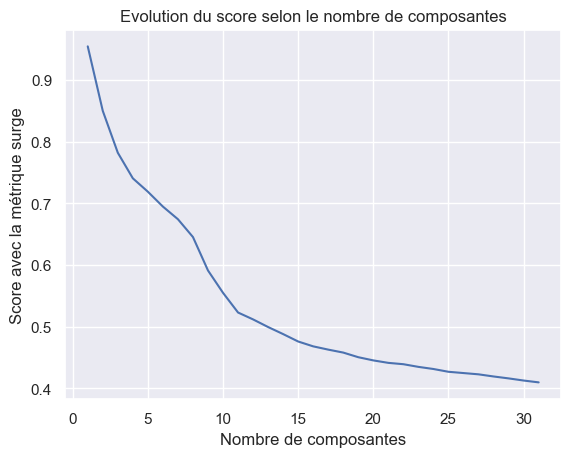

In [24]:
import seaborn as sns
sns.set()
plt.plot(np.arange(1,32),metrique)
plt.xlabel("Nombre de composantes")
plt.ylabel("Score avec la métrique surge")
plt.title("Evolution du score selon le nombre de composantes")
plt.show()

df_pred_test.to_csv('Y_test_prediction.csv', index_label='id_sequence', sep=',') # conversion d'un df en csv

#### Teste des erreurs sur un nombre de composantes fixés pour rechercher le meilleur nombre de composantes

In [21]:
# PLS avec nb de composantes optimal
pls_opt = PLSRegression(n_components=31)

# Fit sur l'échantillon d'apprentissage
pls_opt.fit(Xtrain, surge_train)

predict_train = pls_opt.predict(Xtrain)
predict_test = pls_opt.predict(Xtest)

predict_train=pd.DataFrame(predict_train).T
predict_test=pd.DataFrame(predict_test).T

y_columns = [f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)]
df_pred_train, df_pred_test = get_dataframes(predict_train, predict_test)

df_surge_train = pd.DataFrame(data=surge_train, columns=y_columns, index=Y_train['id_sequence'])


In [22]:
surge_prediction_metric(y_true=df_surge_train,y_pred=df_pred_train)
# 0.4096 pour 31 composantes

0.4096840765372157

### LASSO

In [18]:
from sklearn.linear_model import MultiTaskLassoCV, Lasso


metrique=[]
alpha=0.011

print(f"Régression lasso avec {alpha} composantes")
    
# données
Xtrain, Xtest = get_ech_complet(slp_train, surgesinput_train, slp_test, surgesinput_test)

# PLS avec nb de composantes optimal
LASSO = Lasso(alpha=alpha)

# Fit sur l'échantillon d'apprentissage
LASSO.fit(Xtrain, surge_train )

predict_train = LASSO.predict(Xtrain)
predict_test = LASSO.predict(Xtest)


predict_train=pd.DataFrame(predict_train)
predict_test=pd.DataFrame(predict_test)

y_columns = [f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)]
df_pred_train, df_pred_test = get_dataframes(predict_train.T, predict_test.T)

df_surge_train = pd.DataFrame(data=surge_train, columns=y_columns, index=Y_train['id_sequence'])
print(surge_prediction_metric(y_true=df_surge_train,y_pred=df_pred_train))

Régression lasso avec 0.011 composantes
(5599, 8405) (5599, 20)
(509, 8405) (509, 20)
0.38879624414418623


# Conversion des résultats au format csv

In [20]:
predict_test = pd.DataFrame(predict_test).T
df_pred_test = pd.DataFrame(data=predict_test.values, columns=y_columns, index=X_test['id_sequence'])
df_pred_test.index.names=["id_sequence"]
df_pred_test.to_csv('Y_test_prediction_LASSO_0.011.csv', index_label='id_sequence', sep=',') # conversion d'un df en csv